In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv('/content/sample_data/california_housing_train.csv')
test = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


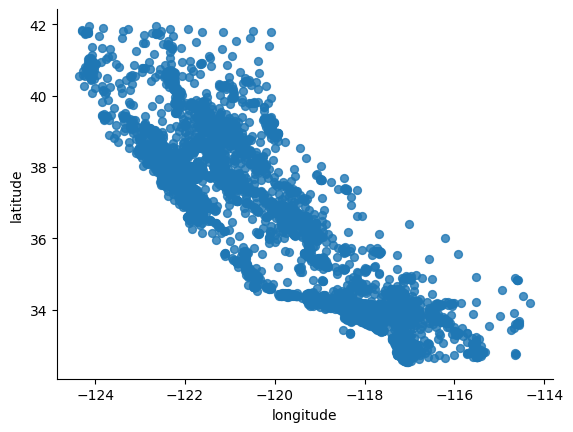

In [ ]:
# @title longitude vs latitude

from matplotlib import pyplot as plt
train.plot(kind='scatter', x='longitude', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

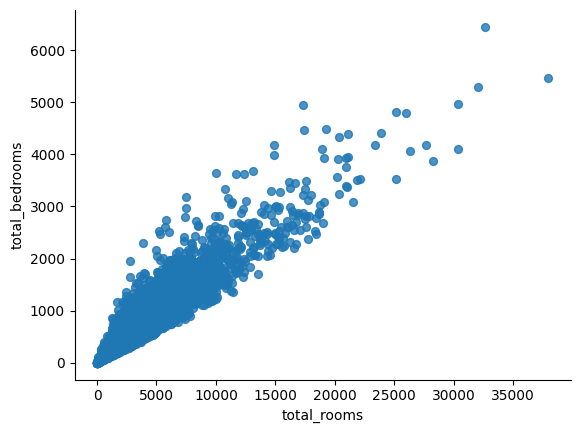

In [ ]:
# @title total_rooms vs total_bedrooms

from matplotlib import pyplot as plt
train.plot(kind='scatter', x='total_rooms', y='total_bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
std = StandardScaler()
train = std.fit_transform(train)
test = std.fit_transform(test)

In [ ]:
train_df = pd.DataFrame(train, columns=['longitude', 'latitude', 'housing_median_age',
                                       'total_rooms', 'total_bedrooms', 'population',
                                       'households', 'median_income', 'median_house_value'])
test_df = pd.DataFrame(test, columns=['longitude', 'latitude', 'housing_median_age',
                                      'total_rooms', 'total_bedrooms', 'population',
                                      'households', 'median_income', 'median_house_value'])
X_train = train_df.drop('median_house_value', axis=1)
y_train = train_df['median_house_value']
X_test = test_df.drop('median_house_value', axis=1)
y_test = test_df['median_house_value']

In [ ]:
model = RandomForestRegressor(n_estimators=200,max_depth = None,max_features='log2')
model.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=200)

In [ ]:
model.score(X_test, y_test)

0.783154013736145

In [ ]:
model2 = GradientBoostingRegressor(n_estimators=200,max_depth= 10)
model2.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=200)

In [ ]:
model2.score(X_test, y_test)

0.7815366370700156

In [46]:
mean_squared_error(y_test, model.predict(X_test))

0.21684598626385507

In [ ]:
y_pred = model.predict(X_test)
top_5_pred = y_pred[:5]
top_5_true = y_test[:5]

print("\nTop 5 Predictions vs Original Values:")
for i in range(5):
    adjusted_prediction = top_5_pred[i] * (np.std(y_pred) + np.mean(y_pred))
    original_value = top_5_true[i] * (np.std(y_test) + np.mean(y_test))
    print(f"Prediction: {adjusted_prediction:.2f}, Original: {original_value}")


Top 5 Predictions vs Original Values:
Prediction: 1.45, Original: 1.2276985216383725
Prediction: 0.25, Original: -0.2594700173372599
Prediction: 0.45, Original: 0.5716467642543539
Prediction: 0.61, Original: 1.0977260036660668
Prediction: -0.91, Original: -1.0976601332402915


In [47]:
mean_squared_error(y_test, model2.predict(X_test))

0.21846336292998436

In [ ]:
y_pred = model2.predict(X_test)
top_5_pred = y_pred[:5]
top_5_true = y_test[:5]
print("\nTop 5 Predictions vs Original Values:")
for i in range(5):
    adjusted_prediction = top_5_pred[i] * (np.std(y_test) + np.mean(y_test))
    original_value = top_5_true[i] * (np.std(y_test) + np.mean(y_test))
    print(f"Prediction: {adjusted_prediction:.2f}, Original: {original_value}")


Top 5 Predictions vs Original Values:
Prediction: 1.89, Original: 1.2276985216383725
Prediction: 0.19, Original: -0.2594700173372599
Prediction: 0.35, Original: 0.5716467642543539
Prediction: 0.71, Original: 1.0977260036660668
Prediction: -1.08, Original: -1.0976601332402915
